In [2]:
#Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error

#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
# Loading data
emp_absent = pd.read_excel('Absenteeism_at_work_Project.xls')
emp_absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Exploratory Data Analysis

In [7]:
emp_absent.shape

(740, 21)

In [8]:
# First 5 rows of data
emp_absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [10]:
# Data Types of all the variables
emp_absent.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [11]:
# Number of Unique values present in each variable
emp_absent.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [12]:
#Transform data types
emp_absent['ID'] = emp_absent['ID'].astype('category')

emp_absent['Reason for absence'] = emp_absent['Reason for absence'].replace(0,20)
emp_absent['Reason for absence'] = emp_absent['Reason for absence'].astype('category')

emp_absent['Month of absence'] = emp_absent['Month of absence'].replace(0,np.nan)
emp_absent['Month of absence'] = emp_absent['Month of absence'].astype('category')

emp_absent['Day of the week'] = emp_absent['Day of the week'].astype('category')
emp_absent['Seasons'] = emp_absent['Seasons'].astype('category')
emp_absent['Disciplinary failure'] = emp_absent['Disciplinary failure'].astype('category')
emp_absent['Education'] = emp_absent['Education'].astype('category')
emp_absent['Son'] = emp_absent['Son'].astype('category')
emp_absent['Social drinker'] = emp_absent['Social drinker'].astype('category')
emp_absent['Social smoker'] = emp_absent['Social smoker'].astype('category')
emp_absent['Pet'] = emp_absent['Pet'].astype('category')

In [13]:
#Make a copy of dataframe
df = emp_absent.copy()

In [14]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Missing Value Analysis

In [15]:
#Creating dataframe with number of missing values
missing_val = pd.DataFrame(df.isnull().sum())

#Reset the index to get row names as columns
missing_val = missing_val.reset_index()

#Rename the columns
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_perc'})
missing_val

#Calculate percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(df))*100

#Sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values('Missing_perc', ascending = False).reset_index(drop = True)

#Save output to csv file
missing_val.to_csv("Missing_perc.csv", index = False)

missing_val

,Variables,Missing_perc
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


# Impute missing values


In [16]:
#Actual value = 31
#Mean = 26.67
#Median = 25
#KNN = 30.80
print(df['Body mass index'].iloc[1])

#Set the value of first row in Body mass index as NAN
#create missing value
df['Body mass index'].iloc[1] = np.nan

31.0


C:\Users\Galaxy Info\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#Impute with mean
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())

#Impute with median
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())

#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df['Body mass index'].iloc[1]

Imputing row 1/740 with 0 missing, elapsed time: 0.283
Imputing row 101/740 with 1 missing, elapsed time: 0.313
Imputing row 201/740 with 0 missing, elapsed time: 0.316
Imputing row 301/740 with 0 missing, elapsed time: 0.319
Imputing row 401/740 with 0 missing, elapsed time: 0.321
Imputing row 501/740 with 0 missing, elapsed time: 0.322
Imputing row 601/740 with 0 missing, elapsed time: 0.324
Imputing row 701/740 with 0 missing, elapsed time: 0.325


30.80814535416026

In [18]:
#Round the values of categorical values
for i in categorical_vars:
    df.loc[:,i] = df.loc[:,i].round()    
    df.loc[:,i] = df.loc[:,i].astype('category')

In [19]:
#Check if any missing values
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Distribution of data using graphs

C:\Users\Galaxy Info\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Galaxy Info\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


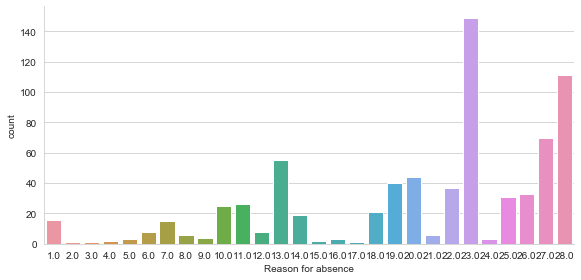

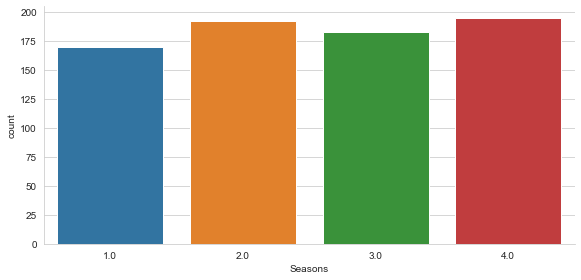

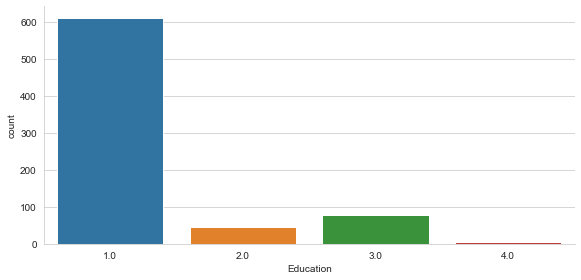

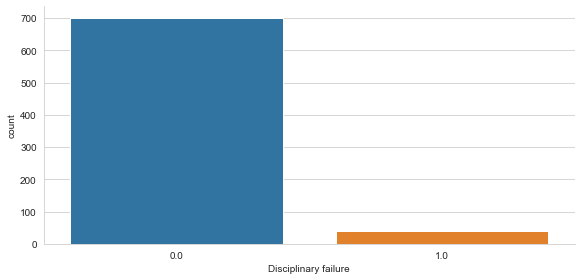

In [20]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

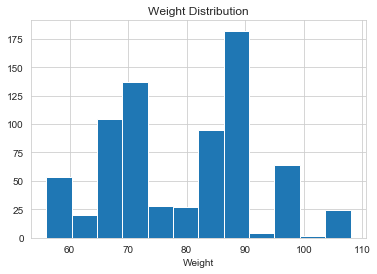

In [21]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

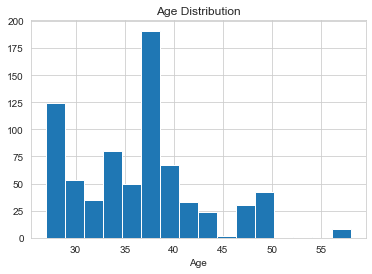

In [22]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0, 0.5, 'Count of bikes')

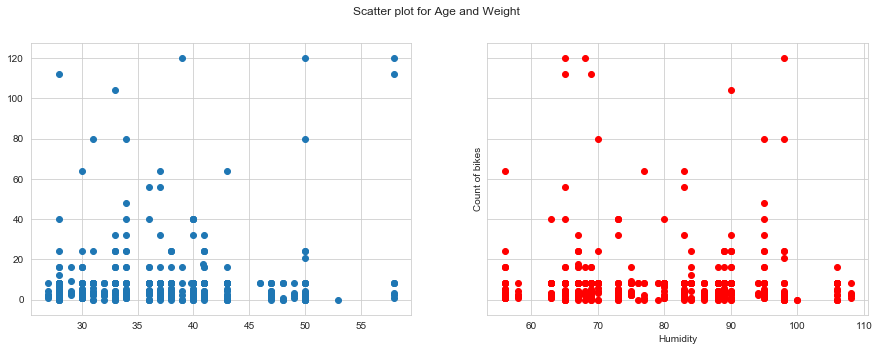

In [23]:
#Check the distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='Age', y='Absenteeism time in hours')
axs[1].scatter(data=df, x='Weight', y='Absenteeism time in hours', color = 'red')
fig.suptitle('Scatter plot for Age and Weight')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

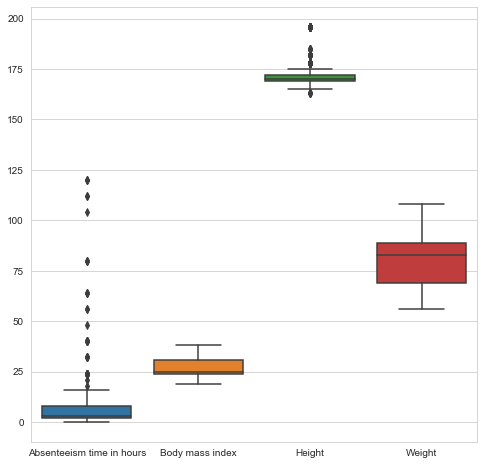

In [24]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

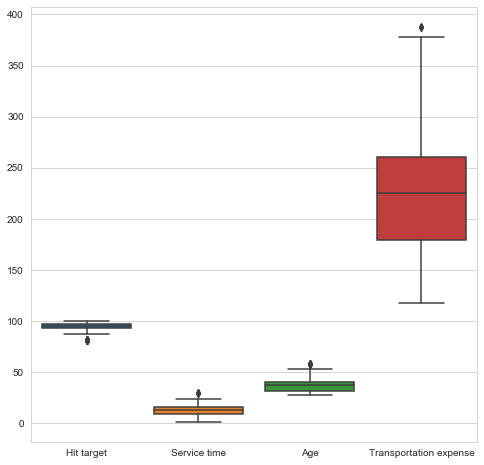

In [25]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

# Outlier Analysis

In [26]:
#Check for outliers using boxplots
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.245
Imputing row 101/740 with 1 missing, elapsed time: 0.248
Imputing row 201/740 with 0 missing, elapsed time: 0.251
Imputing row 301/740 with 0 missing, elapsed time: 0.256
Imputing row 401/740 with 0 missing, elapsed time: 0.258
Imputing row 501/740 with 0 missing, elapsed time: 0.260
Imputing row 601/740 with 0 missing, elapsed time: 0.262
Imputing row 701/740 with 0 missing, elapsed time: 0.265


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

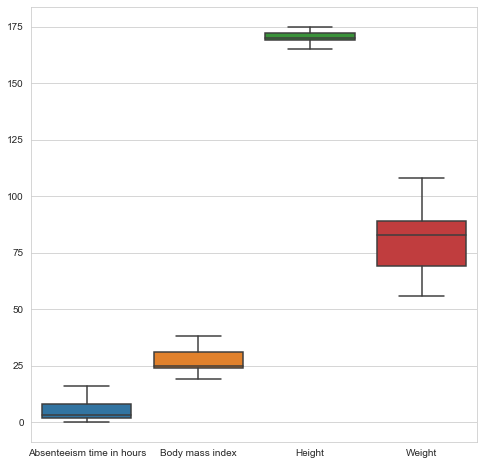

In [27]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

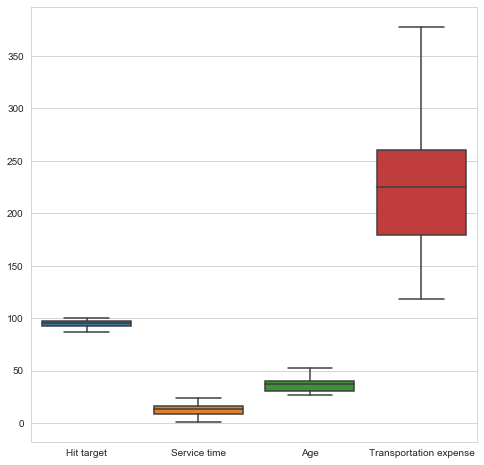

In [28]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

# Feature Selection

In [29]:
#Get dataframe with all continuous variables
df_corr = df.loc[:,continuous_vars]

[]

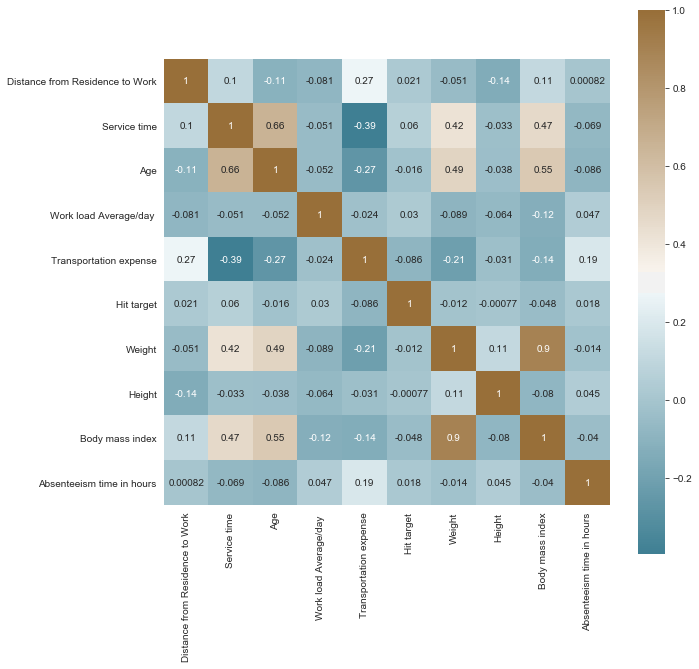

In [30]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [31]:
#Variable Reduction
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [32]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Weight')

In [33]:
#Make a copy of clean data and export it as excel file
clean_data = df.copy()

In [34]:
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

# Feature Scaling

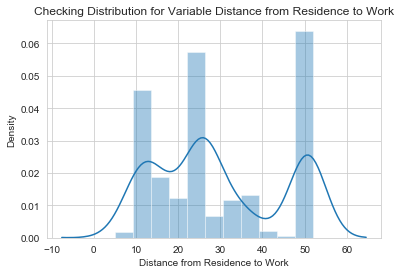

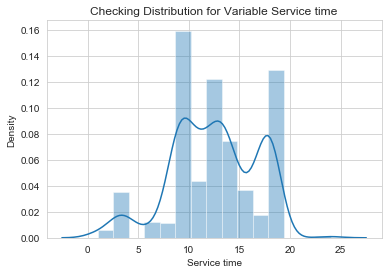

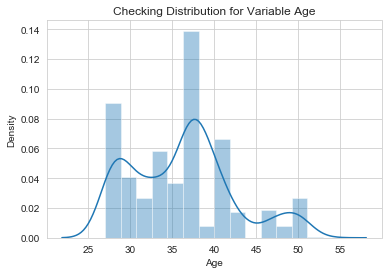

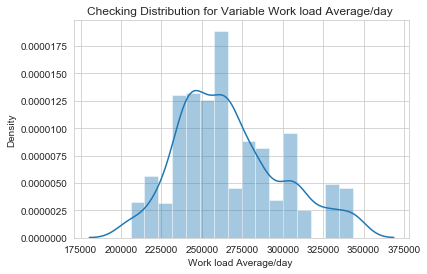

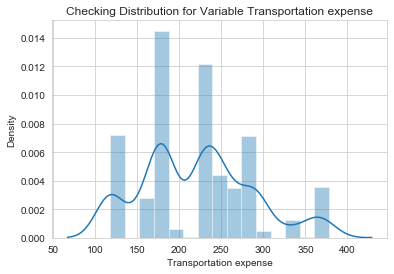

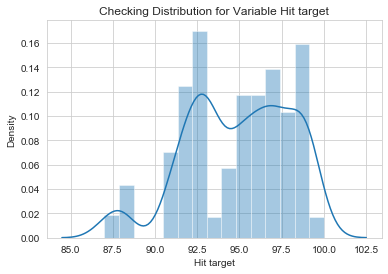

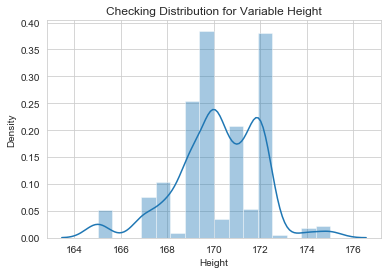

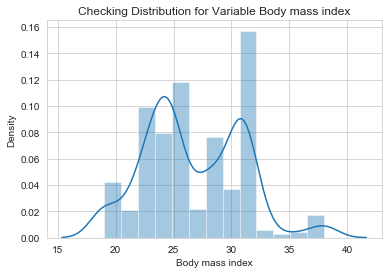

In [35]:
#Normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [37]:
#Normalization of continuous variables
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

# Machine Learning Models

In [38]:
#Create dummy variables of factor variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [39]:
#Get number of rows and columns
df.shape

(740, 115)

In [40]:
#Observe the first row
df.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,4.0,0,...,1,0,0,0,0,0,0,1,0,0


In [41]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.20, random_state = 1)

# Decision Tree
#RMSE: 4.056
#R-squared: -0.4481

In [42]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual      pred
681     8.0  8.000000
257     2.0  3.871452
527     8.0  8.000000
637     8.0  2.000000
429     4.0  1.000000
Root Mean Squared Error: 4.054266333381151
R^2 Score(coefficient of determination) = -0.44632504390482297


# Random Forest
#RMSE: 2.7114
#R-squared: 0.353

In [43]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
681     8.0  4.772835
257     2.0  3.780791
527     8.0  5.550341
637     8.0  3.330381
429     4.0  3.224877
Root Mean Squared Error: 2.7108558490618275
R^2 Score(coefficient of determination) = 0.3533724485351568


# Linear Regression
#RMSE: 40145e+8
#R-squared: -1.4181e+24

In [44]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual     pred
681     8.0  4.84375
257     2.0  4.28125
527     8.0  7.25000
637     8.0  5.21875
429     4.0  2.81250
Root Mean Squared Error: 9859083246296.082
R^2 Score(coefficient of determination) = -8.552920269716296e+24


# Dimension Reduction using PCA

In [45]:
#Get the target variable
target = df['Absenteeism time in hours']

In [46]:
#Get the number of rows and columns of data
df.shape

(740, 115)

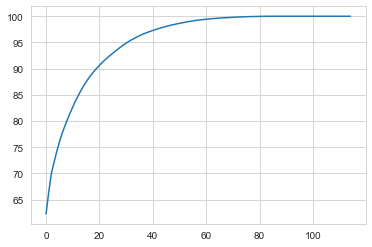

In [47]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

#Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [48]:
#Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

# Decision Tree
#RMSE: 0.0353
#R-squared: 0.9998

In [49]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 0.03536427341888292
R^2 Score(coefficient of determination) = 0.9998899548680272


# Random Forest
#RMSE: 0.04453
#R-squared: 0.9998

In [50]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
681     8.0  8.000000
257     2.0  1.999581
527     8.0  8.000000
637     8.0  8.000000
429     4.0  4.002500
Root Mean Squared Error: 0.04453457480648499
R^2 Score(coefficient of determination) = 0.9998254837080255


# Linear Regression
#RMSE: 0.0013
#R-squared: 0.9999

In [51]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 0.007316941162223001
R^2 Score(coefficient of determination) = 0.9999952891369199
